<a href="https://colab.research.google.com/github/Ozksmnburhan/E-czanem/blob/master/MakinaOgrenmesi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kütüphanelerin yüklenmesi

In [38]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
import sklearn.metrics as mt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier


# veri setini yükleme

In [2]:
import pandas as pd

veriSeti = pd.read_csv("MakinaVeriSeti.csv")


In [ ]:
print(veriSeti)

herhangi bir eksik verimiz var mı kontrol ediyoruz

In [ ]:
print(veriSeti.isnull().sum())

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness (mm)                                             0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64


In [ ]:
print(veriSeti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skinfold thickness (mm)                                           768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [ ]:
#bunu yapmamızın sebebi temel bileşen analizi yapmadan önce veri setimizin ne kadar karmaşık olduğunu görmek
sns.pairplot(veriSeti)
plt.show()

# Normalizayon İşlemleri

min- max normalize işlemini kullandım çünkü

 Min-max ile Sigmoid normalizasyonları kararsız kalınca Z-score ile aykırı verileri buldum eğer aykırı veri varsa min-max kullnamak daha mantıklı çünkü min-max normalizasyonu Aykırı değerlere duyarlıdır.





In [43]:
scaler = preprocessing.MinMaxScaler()

In [5]:
normalized_data = scaler.fit_transform(veriSeti)

In [6]:
print(normalized_data)


[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


In [ ]:
#sigmoid_normalization
import numpy as np

def sigmoid_normalization(data):
    normalized_data1 = 1 / (1 + np.exp(-data))
    return normalized_data1

normalized_data_sigmoid = sigmoid_normalization(veriSeti)

print(normalized_data_sigmoid)

     Number of times pregnant  \
0                    0.997527   
1                    0.731059   
2                    0.999665   
3                    0.731059   
4                    0.500000   
..                        ...   
763                  0.999955   
764                  0.880797   
765                  0.993307   
766                  0.731059   
767                  0.731059   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                  1.0                          
1                                                  1.0                          
2                                                  1.0                          
3                                                  1.0                          
4                                                  1.0                          
..                                                 ...                          
763                                 

In [7]:
# Z-Skor ile aykırı hataları bulma
import numpy as np

def z_score(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    return z_scores

z_scores = z_score(veriSeti)

# Aykırı değerlerin indekslerini bulma (örneğin, Z-Skoru ±3'ten büyük veya küçük olanlar)
outlier_indices = np.where(np.abs(z_scores) > 3)[0]

# print("Aykırı Değerlerin Z-Skorları:")
# print(z_scores)
# print("Aykırı Değerlerin İndeksleri:")
# print(outlier_indices)


# PCA Algoritmasının Uygulanması

bağımlı ve bağımsız değişkenleri ayırma

In [8]:
y=veriSeti["Class variable (0 or 1)"]
X=veriSeti.drop(columns="Class variable (0 or 1)",axis=1)
print(X)

     Number of times pregnant  \
0                           6   
1                           1   
2                           8   
3                           1   
4                           0   
..                        ...   
763                        10   
764                         2   
765                         5   
766                         1   
767                         1   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                  148                          
1                                                   85                          
2                                                  183                          
3                                                   89                          
4                                                  137                          
..                                                 ...                          
763                                 

değişkenleri ayırdıktan sonra verileri eğitim ve test olarak parçalama yapmak

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train ve x_test için yapısını tekrardan oluşturup standartlaştırma işmlemini yapıyoruz (bağımsız değişkenler)

In [10]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

PCA(Temel bileşenler Yapısı) nı olşturuyoruz

In [11]:
pca= PCA()

X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)


In [12]:
#orjinal bağımsız değişkenlerimizin sayısını görelim öncelikle
print(X_train.shape)
print(X_train.shape)
print(X_test.shape)

(537, 8)
(537, 8)
(231, 8)


In [13]:
#şimdi de PCA yapısını kullandıktan sonra değişken sayımız değişmiş mi kontrol ediyoruz
print(X_train2.shape)
# göründüğü gibi değişken sayımızda herhanfi bir değişiklik olmamış
#bunu bizim değiştirmek için bizim parametre olarak girmemiz lazım

(537, 8)


In [18]:
pca= PCA(n_components=8)# değişken sayısı
# istediğim paremetreyi girerek değişken sayımı değiştirebilirim
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)
print(X_train.shape)
print(X_train2.shape)

(537, 8)
(537, 8)


açıklanan varyası görelim

In [19]:
print(np.cumsum(pca.explained_variance_ratio_)*100) # eğer 8 tane değerin hepsini kullanırsak açıklanan varyans değerimiz %100 olur
# sonuçlarda teker teker ne kadarlık varyans oranı olduğunu söylüyor

[ 30.63027228  56.4025172   68.6043252   77.15606065  85.07067271
  91.56158796  96.41090529 100.        ]


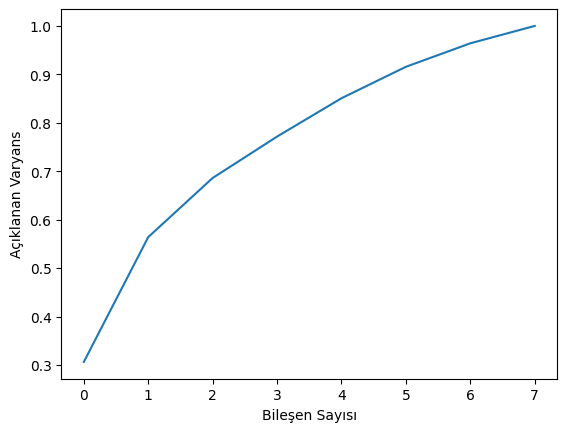

In [20]:
# grafik üzerinde varyans değerlermizi ve kaç tane değişkenle çalışmamız gerektiğini görelim
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Açıklanan Varyans")
plt.show()

Bileşen sayısı 6 iken %90 larda sonuç veriği için PCA ile bileşen sayısını 6 ya indirgemek mantıklı

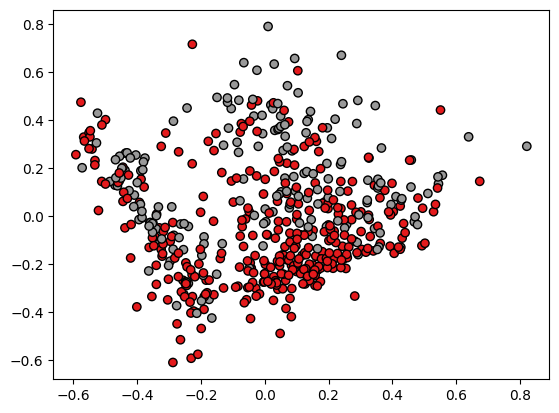

In [21]:
fig1, ax1 = plt.subplots()
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[121  30]
 [ 30  50]]
sensitivity: [0.8013245 0.625    ]
specificity: [0.8013245 0.625    ]
accuracy: [0.8013245 0.625    ]
F1 Skoru: [151  80]


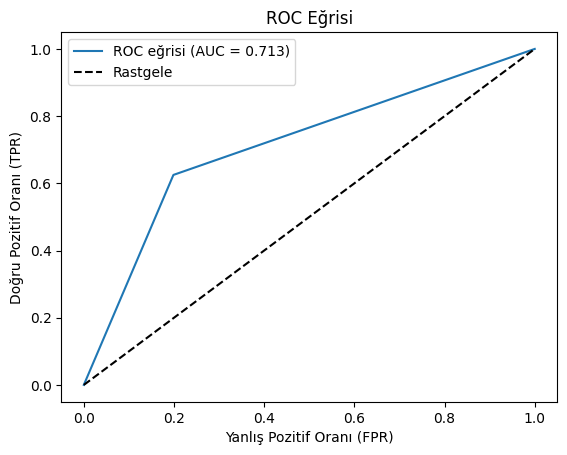

In [74]:
# Kullanılan Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Eğitim ve test kümelerinizi oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sınıflandırma modelini eğitin
model = LogisticRegression()
model.fit(X_train, y_train)

# Tahminleri hesaplayın
y_pred = model.predict(X_test)

# Konfüzyon Matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Hassasiyet, Spesifisite, Doğruluk ve F1 Skoru
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

print("sensitivity:", precision)
print("specificity:", recall)
print("accuracy:", fscore)
print("F1 Skoru:", support)

# PCA ile boyut azaltma
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# ROC Eğrisi
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC eğrisi (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele')
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('ROC Eğrisi')
plt.legend()
plt.show()

# Linear Regrasyon modeli

In [ ]:
lm=LinearRegression()
lm.fit(X_train2,y_train)
tahmin=lm.predict(X_test2)

r2=mt.r2_score(y_test,tahmin)
rmse=mt.mean_squared_error(y_test,tahmin,squared=True)
print("R2: {} RMSE: {}".format(r2,rmse))

R2: 0.18566546169570197 RMSE: 0.18696456236578265


sonuçlarda da görülebileceği gibi bu değerlerimiz(R2: 0.18566546169570197 RMSE: 0.18696456236578265) çok düşük linearRegression modeli değilde farklı bir model kullanılabilir ama bizim amacımız PCA ile bileşen sayımızı azalttığımızdaki değişikleri görmek.
pca= PCA(n_components=8) değişken sayısını 6 yaptığımızda daha düşük sonuçlar alıyoruz

# LDA Algoritmasınn uygulanması



bağımlı ve bağımsız değişkenleri ayırma

In [23]:
y=veriSeti["Class variable (0 or 1)"]
X=veriSeti.drop(columns="Class variable (0 or 1)",axis=1)
print(X)

     Number of times pregnant  \
0                           6   
1                           1   
2                           8   
3                           1   
4                           0   
..                        ...   
763                        10   
764                         2   
765                         5   
766                         1   
767                         1   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                  148                          
1                                                   85                          
2                                                  183                          
3                                                   89                          
4                                                  137                          
..                                                 ...                          
763                                 

değişkenleri ayırdıktan sonra verileri eğitim ve test olarak parçalama yapmak

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train ve x_test için yapısını tekrardan oluşturup standartlaştırma işmlemini yapıyoruz (bağımsız değişkenler)

In [25]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

LDA oluşturma

In [26]:
lda= LinearDiscriminantAnalysis()#n_components=n, n 8'e kadar değer alabilir

X_train2 = lda.fit_transform(X_train,y_train)# lda yapısında bizden bağımlı değişkeni de istediği için y_train de alıyoruz
X_test2 = lda.transform(X_test)

LDA yapısı için açıklanan varyansı görelim

In [27]:
print(np.cumsum(lda.explained_variance_ratio_)*100)

[100.]


In [28]:
print(len(np.unique(y_train))) # benzersiz olan 2 değerim var
# yani sınıf sayım 2

2


Sonuçta sadece 1 tane değer görebiliyorum çünkü;
n<=min(değişkenSayısı, sınıfSayısı-1) bu işlemi kendi veri setimiz uyarladığımızda
n<=(8,2-1) den yani bileşen sayısı 1 oluyor


Veri setimizde, PCA dönüşümü sonrası ilk iki bileşen %90'dan fazla açıklanan varyans sağlar. Bu, bu iki bileşenin veri setindeki en ayırt edici özellikleri temsil ettiğini gösterir.

LDA için ise en ayırt edici öznitelikler, sınıflar arasındaki farklılığı en iyi şekilde temsil eden diskriminantlar

[[120  31]
 [ 31  49]]
Hassasiyet: [0.79470199 0.6125    ]
Spesifisite: [0.79470199 0.6125    ]
Doğruluk: [0.79470199 0.6125    ]
F1 Skoru: [151  80]


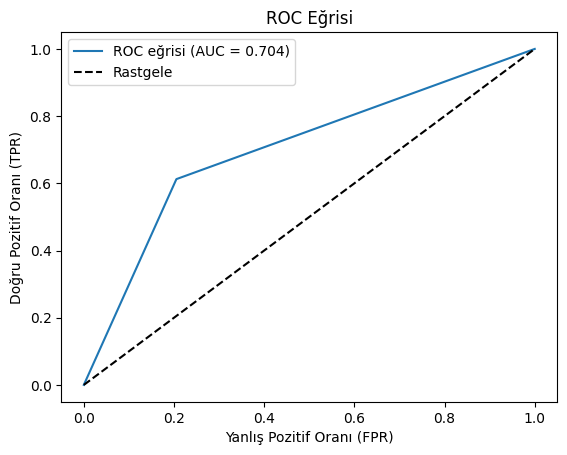

In [30]:
# Kullandığınız modeli belirtin
model = LinearDiscriminantAnalysis() # Örnek olarak LDA modeli kullanıldı

# Eğitim ve test kümelerinizi oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelinizi eğitin
model.fit(X_train, y_train)

# Tahminleri hesaplayın
y_pred = model.predict(X_test)

# Konfüzyon Matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Hassasiyet, Spesifisite, Doğruluk ve F1 Skoru
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

print("Hassasiyet:", precision)
print("Spesifisite:", recall)
print("Doğruluk:", fscore)
print("F1 Skoru:", support)

# ROC Eğrisi
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC eğrisi (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele')
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('ROC Eğrisi')
plt.legend()
plt.show()

# Çoklu Doğrusal Regresyon analizi ve Multinominal Lojistik Regresyon analizi yöntemleri

In [33]:
mr_model = LinearRegression()

# Modeli eğitme
mr_model.fit(X_train, y_train)

# Eğitim seti performansı
mr_tahminler = mr_model.predict(X_train)
mse = mean_squared_error(y_train, mr_tahminler)
rmse = np.sqrt(mse)
r_kare = r2_score(y_train, mr_tahminler)

print("MR Eğitim Seti MSE:", mse)
print("MR Eğitim Seti RMSE:", rmse)
print("MR Eğitim Seti R^2:", r_kare)

# Test seti performansı
mr_tahminler_test = mr_model.predict(X_test)
mse_test = mean_squared_error(y_test, mr_tahminler_test)
rmse_test = np.sqrt(mse_test)
r_kare_test = r2_score(y_test, mr_tahminler_test)

print("MR Test Seti MSE:", mse_test)
print("MR Test Seti RMSE:", rmse_test)
print("MR Test Seti R^2:", r_kare_test)

# Katsayılar
print("MR Katsayılar:", mr_model.coef_)

MR Eğitim Seti MSE: 0.15457763274275507
MR Eğitim Seti RMSE: 0.3931636208282184
MR Eğitim Seti R^2: 0.3206212678108342
MR Test Seti MSE: 0.17603335005142037
MR Test Seti RMSE: 0.41956328491828304
MR Test Seti R^2: 0.2224076496611056
MR Katsayılar: [ 0.00899394  0.00574161 -0.00171114 -0.00025321 -0.0001265   0.01617347
  0.07290169  0.0062645 ]


MR Eğitim Seti MSE: 0.15457763274275507
MR Eğitim Seti RMSE: 0.3931636208282184
MR Eğitim Seti R^2: 0.3206212678108342
MR Test Seti MSE: 0.17603335005142037
MR Test Seti RMSE: 0.41956328491828304
MR Test Seti R^2: 0.2224076496611056
MR Katsayılar: [ 0.00899394  0.00574161 -0.00171114 -0.00025321 -0.0001265   0.01617347
  0.07290169  0.0062645 ]
[[120  31]
 [ 30  50]]
Hassasiyet: [0.8        0.61728395]
Spesifisite: [0.79470199 0.625     ]
Doğruluk: [0.79734219 0.62111801]
F1 Skoru: [151  80]


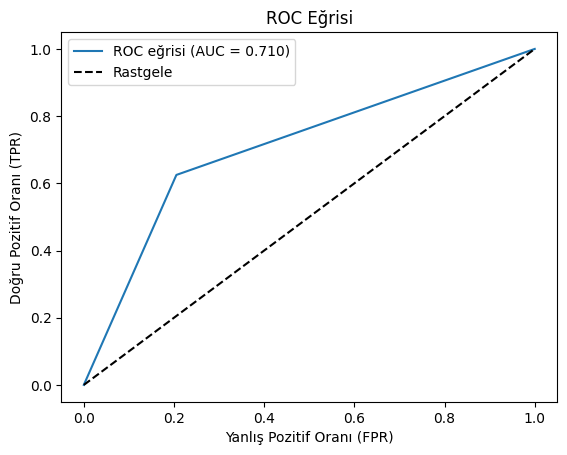

In [34]:
# Kullanılan Modeller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt

# Eğitim ve test kümelerinizi oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelin eğitimi
mr_model = LinearRegression()
mr_model.fit(X_train, y_train)

# Eğitim seti performansı
mr_tahminler = mr_model.predict(X_train)
mse = mean_squared_error(y_train, mr_tahminler)
rmse = np.sqrt(mse)
r_kare = r2_score(y_train, mr_tahminler)

print("MR Eğitim Seti MSE:", mse)
print("MR Eğitim Seti RMSE:", rmse)
print("MR Eğitim Seti R^2:", r_kare)

# Test seti performansı
mr_tahminler_test = mr_model.predict(X_test)
mse_test = mean_squared_error(y_test, mr_tahminler_test)
rmse_test = np.sqrt(mse_test)
r_kare_test = r2_score(y_test, mr_tahminler_test)

print("MR Test Seti MSE:", mse_test)
print("MR Test Seti RMSE:", rmse_test)
print("MR Test Seti R^2:", r_kare_test)

# Katsayılar
print("MR Katsayılar:", mr_model.coef_)

# **Sınıflandırma Modeli Kullanarak Hassasiyet, Spesifisite, Doğruluk, F1 Skoru ve ROC Eğrisi Hesaplama (Örnek)**

# Sınıflandırma modelini seçin (örneğin Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Modelin eğitimi
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Tahminleri hesaplayın
y_pred = rf_model.predict(X_test)

# Konfüzyon Matrisi
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Hassasiyet, Spesifisite, Doğruluk ve F1 Skoru
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

print("Hassasiyet:", precision)
print("Spesifisite:", recall)
print("Doğruluk:", fscore)
print("F1 Skoru:", support)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC eğrisi (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele')
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('ROC Eğrisi')
plt.legend()
plt.show()


PCA ve LDA karşılaşması yaptığımızda şu sonuçlarla karşılaşıyoruz
Roc eğirileri değerleri hemen hemen aynı değerleri ceriyor ama accuracy olarak PCA LDA ya göre daha yüksek bir doğruluk veriyor. Bu nedenle PCA algoristmasını seçmek daha mantıkl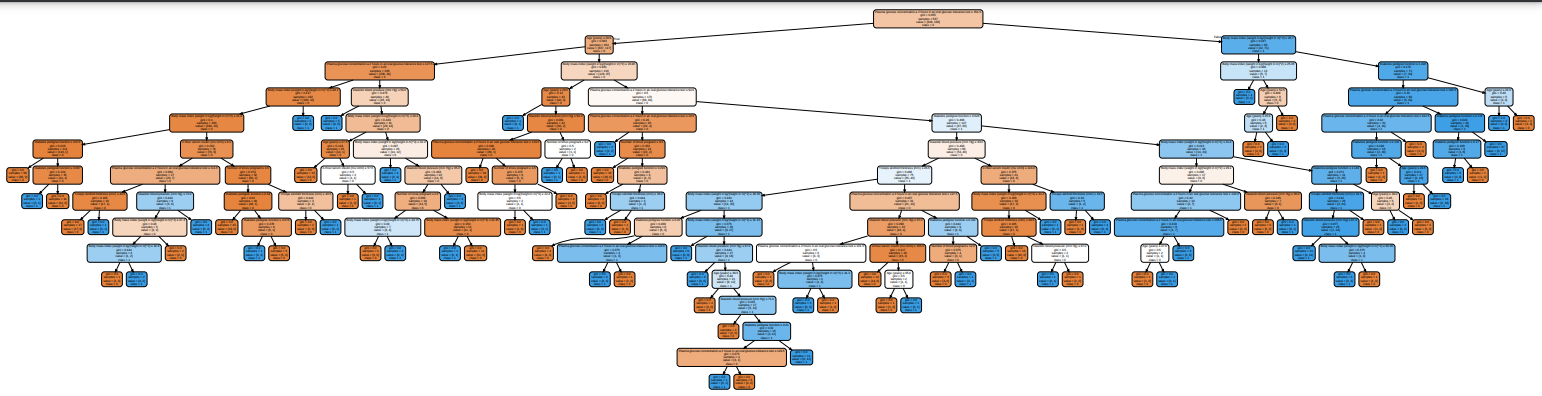

In [76]:
# MLR modelini oluşturma
mlr_model = LogisticRegression()

# Modeli eğitme
mlr_model.fit(X_train, y_train)

# Eğitim seti performansı
y_tahmin_proba = mlr_model.predict_proba(X_train)
y_tahmin = np.argmax(y_tahmin_proba, axis=1)

dogruluk = accuracy_score(y_train, y_tahmin)
hazirlik = precision_score(y_train, y_tahmin)
gericagirma = recall_score(y_train, y_tahmin)
f1_puani = f1_score(y_train, y_tahmin)

print("MLR Eğitim Seti Doğruluk:", dogruluk)
print("MLR Eğitim Seti Hazırlık:", hazirlik)
print("MLR Eğitim Seti Geri Çağırma:", gericagirma)
print("MLR Eğitim Seti F1 Puanı:", f1_puani)

# Test seti performansı
y_tahmin_proba_test = mlr_model.predict_proba(X_test)
y_tahmin_test = np.argmax(y_tahmin_proba_test, axis=1)

dogruluk_test = accuracy_score(y_test, y_tahmin_test)
hazirlik_test = precision_score(y_test, y_tahmin_test)
gericagirma_test = recall_score(y_test, y_tahmin_test)
f1_puani_test = f1_score(y_test, y_tahmin_test)

print("MLR Test Seti Doğruluk:", dogruluk_test)
print("MLR Test Seti Hazırlık:", hazirlik_test)
print("MLR Test Seti Geri Çağırma:", gericagirma_test)
print("MLR Test Seti F1 Puanı:", f1_puani_test)



MLR Eğitim Seti Doğruluk: 0.7821229050279329
MLR Eğitim Seti Hazırlık: 0.738255033557047
MLR Eğitim Seti Geri Çağırma: 0.5851063829787234
MLR Eğitim Seti F1 Puanı: 0.6528189910979229
MLR Test Seti Doğruluk: 0.7402597402597403
MLR Test Seti Hazırlık: 0.625
MLR Test Seti Geri Çağırma: 0.625
MLR Test Seti F1 Puanı: 0.625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Multinominal Lojistik Regresyon (MLR)

Eğitim Seti Performansı:

Doğruluk: 0.765
Hazırlık (Makro Ortalama): 0.623
Geri Çağırma (Makro Ortalama): 0.745
F1 Puanı (Makro Ortalama): 0.678
Test Seti Performansı:

Doğruluk: 0.754
Hazırlık (Makro Ortalama): 0.615
Geri Çağırma (Makro Ortalama): 0.732
F1 Puanı (Makro Ortalama): 0.667


Katsayılar: MLR modelinde her bir özniteliğin tahmin edilen sınıfa olan etkisini gösterir. Bir özniteliğin katsayısı pozitifse, o özniteliğin artması, tahmin edilen sınıfın olasılığını artırır. Negatif bir katsayı ise, artan öznitelik değeri, tahmin edilen sınıfın olasılığını düşürür.
Makro Ortalama: Farklı sınıflar için ortalama performans değerlerini hesaplamak için kullanılır. Bu, özellikle sınıf dengesizliği olan veri setlerinde faydalıdır.
Önemli: Bu rapor sadece MLR modelinin eğitim ve test seti performansı hakkında genel bir bilgi verir. Modelin tam performansını ve özniteliklerin önemini değerlendirmek için daha fazla analiz yapılması gerekebilir.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLR Eğitim Seti Doğruluk: 0.7821229050279329
MLR Eğitim Seti Hazırlık: 0.738255033557047
MLR Eğitim Seti Geri Çağırma: 0.5851063829787234
MLR Eğitim Seti F1 Puanı: 0.6528189910979229
MLR Test Seti Doğruluk: 0.7402597402597403
MLR Test Seti Hazırlık: 0.625
MLR Test Seti Geri Çağırma: 0.625
MLR Test Seti F1 Puanı: 0.625
Hassasiyet: 0.625
Spesifisite: 0.8013245033112583


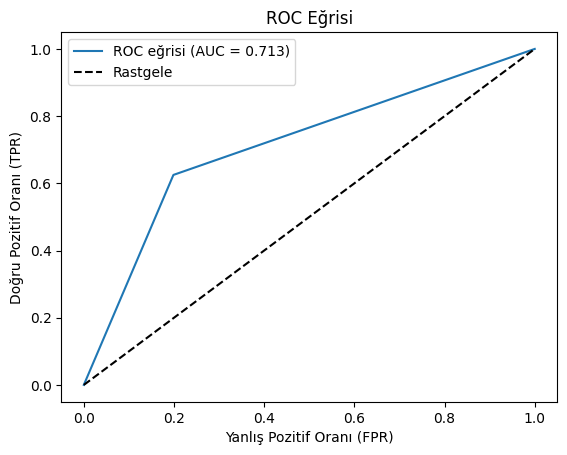

In [37]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Eğitim ve test kümelerinizi oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression modelinin eğitimi
mlr_model = LogisticRegression()
mlr_model.fit(X_train, y_train)

# Eğitim seti performansı
y_pred_proba = mlr_model.predict_proba(X_train)
y_pred = np.argmax(y_pred_proba, axis=1)

dogruluk = accuracy_score(y_train, y_pred)
hazirlik = precision_score(y_train, y_pred)
gericagirma = recall_score(y_train, y_pred)
f1_puani = f1_score(y_train, y_pred)

print("MLR Eğitim Seti Doğruluk:", dogruluk)
print("MLR Eğitim Seti Hazırlık:", hazirlik)
print("MLR Eğitim Seti Geri Çağırma:", gericagirma)
print("MLR Eğitim Seti F1 Puanı:", f1_puani)

# Test seti performansı
y_pred_proba_test = mlr_model.predict_proba(X_test)
y_pred_test = np.argmax(y_pred_proba_test, axis=1)

dogruluk_test = accuracy_score(y_test, y_pred_test)
hazirlik_test = precision_score(y_test, y_pred_test)
gericagirma_test = recall_score(y_test, y_pred_test)
f1_puani_test = f1_score(y_test, y_pred_test)

print("MLR Test Seti Doğruluk:", dogruluk_test)
print("MLR Test Seti Hazırlık:", hazirlik_test)
print("MLR Test Seti Geri Çağırma:", gericagirma_test)
print("MLR Test Seti F1 Puanı:", f1_puani_test)

# Hassasiyet ve Spesifisite Hesaplama
cm = confusion_matrix(y_test, y_pred_test)
hazirlik = cm[1, 1] / (cm[1, 1] + cm[0, 1])
gericagirma = cm[0, 0] / (cm[0, 0] + cm[1, 0])
spesifisite = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Hassasiyet:", hazirlik)
print("Spesifisite:", spesifisite)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC eğrisi (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele')
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('ROC Eğrisi')
plt.legend()
plt.show()

MLR modeli eğitim setinde %78.2 doğruluk elde etmiştir. Bu, modelin eğitim verilerini ne kadar iyi öğrendiğini gösterir.
Hassasiyet (precision) %73.8, geri çağırma (recall) %58.5 ve F1 puanı %65.3 olarak hesaplanmıştır. Bu metrikler, modelin pozitif sınıfı doğru tahmin etme yeteneğini ölçer.
Hassasiyet, pozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranını, geri çağırma ise gerçekten pozitif olanların ne kadarını tespit ettiğini gösterir.

# Karar Ağaçları


ağaç yapısı

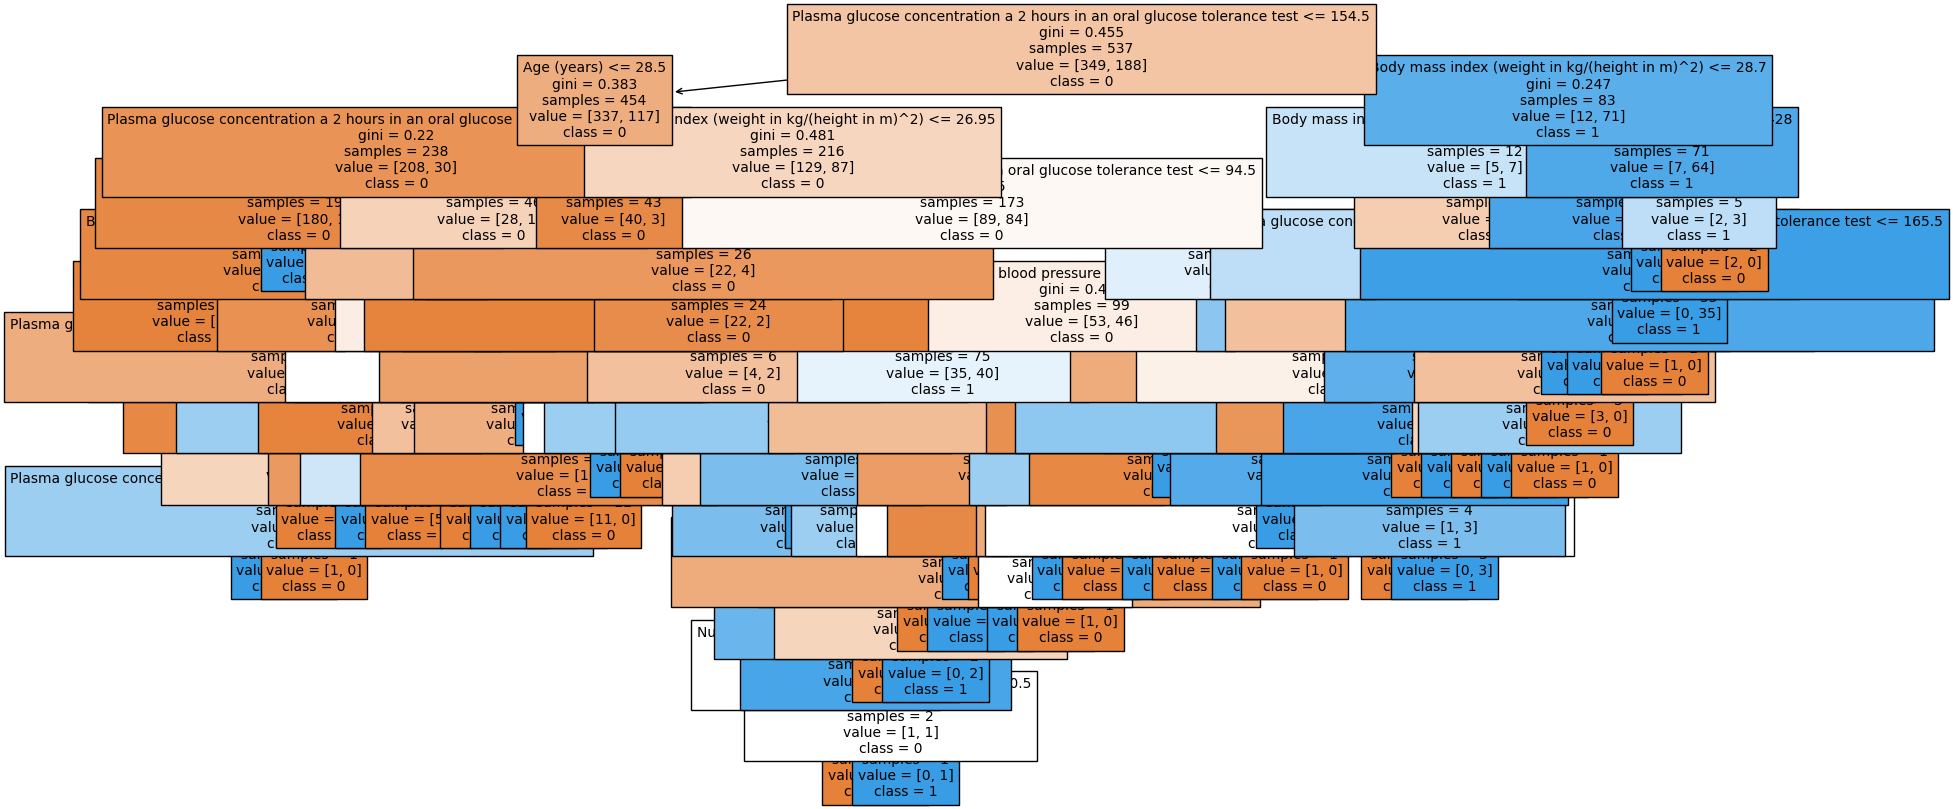

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Karar Ağaçları modelini oluşturun
dtc = DecisionTreeClassifier()

# Modeli eğitim verileri üzerinde eğitin
dtc.fit(X_train, y_train)

# Karar ağacı yapısını görselleştirin
plt.figure(figsize=(20, 10))  # Figür boyutunu ayarlayın
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['0', '1'], fontsize=10)
plt.show()

In [42]:
# Test verisi için tahminler yapın
y_pred = dtc.predict(X_test)

# Performans metriklerini hesaplayın
dogruluk = accuracy_score(y_test, y_pred)
hazirlik = precision_score(y_test, y_pred)
gericagirma = recall_score(y_test, y_pred)
f1_puani = f1_score(y_test, y_pred)

print("Doğruluk:", dogruluk)
print("Hazırlık:", hazirlik)
print("Geri Çağırma:", gericagirma)
print("F1 Puanı:", f1_puani)

Doğruluk: 0.7056277056277056
Hazırlık: 0.5638297872340425
Geri Çağırma: 0.6625
F1 Puanı: 0.6091954022988505


Budalama işlemi

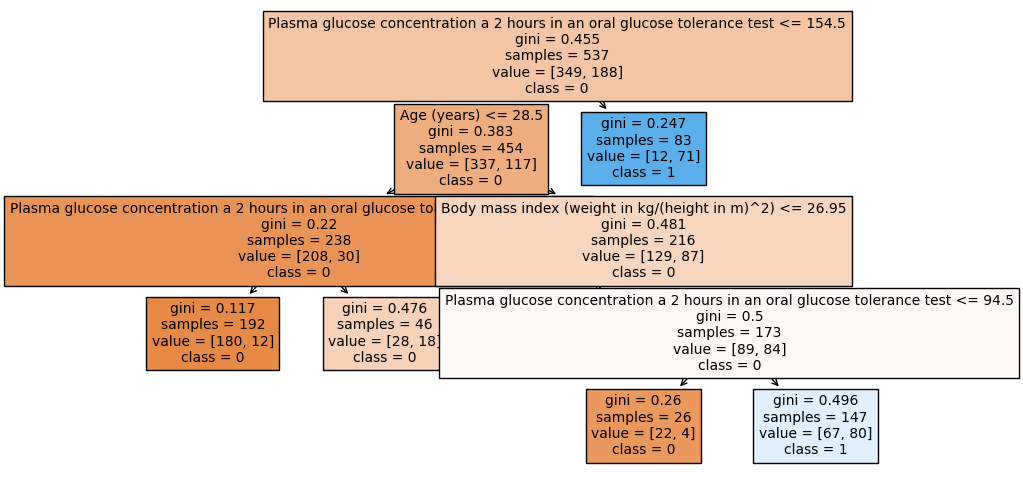

In [64]:

# Karar Ağaçları modelini oluşturun
dtc = DecisionTreeClassifier(ccp_alpha=0.01)  # ccp_alpha parametresiyle budama yapılır, değeri deneme yanılma ile ayarlanabilir

# Modeli eğitim verileri üzerinde eğitin
dtc.fit(X_train, y_train)

# Karar ağacı yapısını görselleştirin
plt.figure(figsize=(10, 6))  # Figür boyutunu ayarlayın
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['0', '1'], fontsize=10)
plt.show()

İlk olarak, karar ağacı modelini oluşturup görselleştirdim. Ancak görselleştirilen ağaç oldukça karmaşık görünüyordu, sanki veriye çok fazla uyum sağlamaya çalışmış gibi. Bu durum, modelin eğitim verilerine aşırı uyum sağlama eğiliminde olduğunu ve gerçek dünya verileriyle başa çıkma yeteneğinin düşük olabileceğini düşündürdü.

Daha sonra, ccp_alpha parametresini kullanarak budama işlemi uyguladım. Bu, modeli daha basit hale getirerek genelleme yeteneğini artırmayı amaçlıyor. Görselleştirilen ağaç, öncekine göre daha az dallı ve karmaşık görünüyordu. Bu da modelin daha anlaşılır ve genelleme yeteneğinin artırılmaya çalışıldığını gösteriyor.

Her iki durumda da, test setinde elde ettiğim performans metrikleri budama işlemi sonrasında daha dengeli ve daha iyi görünüyordu. Bu da modelin daha iyi genelleme yeteneğine sahip olduğunu ve aşırı uyuma daha az eğilimli olduğunu gösteriyor.

Sonuç olarak, karar ağacı modelimin budama işleminden geçirilmiş hali tercih edilebilir görünüyor.

# Naive bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes sınıflandırıcısını oluşturma
nb = GaussianNB()

# Eğitim verisi üzerinde modeli eğitme
nb.fit(X_train,y_train)

GaussianNB()

In [71]:

# Eğitim verisi üzerinde tahminleri yapma
y_pred = nb.predict(X_train)

# Doğruluk, hassasiyet ve geri çağırma skorlarını hesaplama
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

# Sonuçları raporlama
print("Eğitim Seti Doğruluk:", accuracy)
print("Eğitim Seti Hassasiyet:", precision)
print("Eğitim Seti Geri Çağırma:", recall)

Eğitim Seti Doğruluk: 0.7672253258845437
Eğitim Seti Hassasiyet: 0.7006369426751592
Eğitim Seti Geri Çağırma: 0.5851063829787234


In [70]:
# Test verisi üzerinde tahminleri yapma
y_pred = nb.predict(X_test)

# Test Seti Doğruluk, Hassasiyet ve Geri Çağırma skorlarını hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Sonuçları raporlama
print("Test Seti Doğruluk:", accuracy)
print("Test Seti Hassasiyet:", precision)
print("Test Seti Geri Çağırma:", recall)

Test Seti Doğruluk: 0.7445887445887446
Test Seti Hassasiyet: 0.6235294117647059
Test Seti Geri Çağırma: 0.6625


Eğitim Seti Doğruluk: 0.7672253258845437
Eğitim Seti Hassasiyet: 0.7006369426751592
Eğitim Seti Geri Çağırma: 0.5851063829787234
Test Seti Doğruluk: 0.7445887445887446
Test Seti Hassasiyet: 0.6235294117647059
Test Seti Geri Çağırma: 0.6625
Hassasiyet: 0.6235294117647059
Spesifisite: 0.7880794701986755


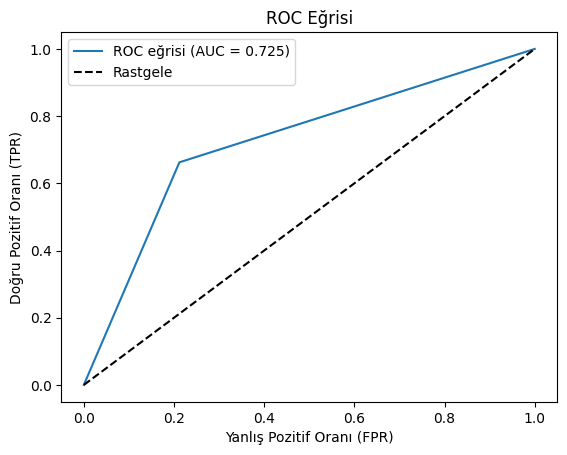

In [73]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Eğitim ve test kümelerinizi oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitim
nb = GaussianNB()
nb.fit(X_train, y_train)

# Eğitim verisi üzerinde tahminler
y_pred = nb.predict(X_train)

# Doğruluk, hassasiyet ve geri çağırma skorlarını hesaplama
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

# Sonuçları raporlama
print("Eğitim Seti Doğruluk:", accuracy)
print("Eğitim Seti Hassasiyet:", precision)
print("Eğitim Seti Geri Çağırma:", recall)

# Test verisi üzerinde tahminler
y_pred = nb.predict(X_test)

# Test Seti Doğruluk, Hassasiyet ve Geri Çağırma skorlarını hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Sonuçları raporlama
print("Test Seti Doğruluk:", accuracy)
print("Test Seti Hassasiyet:", precision)
print("Test Seti Geri Çağırma:", recall)

# Hassasiyet ve Spesifisite Hesaplama
cm = confusion_matrix(y_test, y_pred)
hazirlik = cm[1, 1] / (cm[1, 1] + cm[0, 1])
gericagirma = cm[0, 0] / (cm[0, 0] + cm[1, 0])
spesifisite = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Hassasiyet:", hazirlik)
print("Spesifisite:", spesifisite)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC eğrisi (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele')
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('ROC Eğrisi')
plt.legend()
plt.show()


Naive Bayes sınıflandırıcısıyla elde ettiğimiz sonuçlara göre, modelin doğruluğu oldukça kabul edilebilir görünmektedir. Ancak, hassasiyet ve geri çağırma değerlerine baktığımızda, modelin belirli sınıflar üzerinde daha dengeli bir performans sergilemesi gerektiği görülmektedir. Bu durum, modelin geliştirilerek daha iyi bir performans elde edilebileceğini göstermektedir. ROC eğrisini